# Solución numerica de ecuaciones diferenciales
Este programa soluciona las dos ecuaciones diferenciales acopladas que describen el comportamiento de la temperatura en los dos compartimientos, mediante diferentes metodos de solucion númerica



Para calcular la temperatura de equilibrio que va a haber en el sistema, vamos a partir de los conocimientos base que se tienen sobre la termodinamica. Sabemos que hay equilibrio termodinamico bajo condiciones de volumen variable, cuando la presión de ambos lados de un pistón movil es la misma, por lo cual, la fuerza neta sobre este es cero. 

A partir de esto y aplicando la ley de gases ideales tendriamos que: 


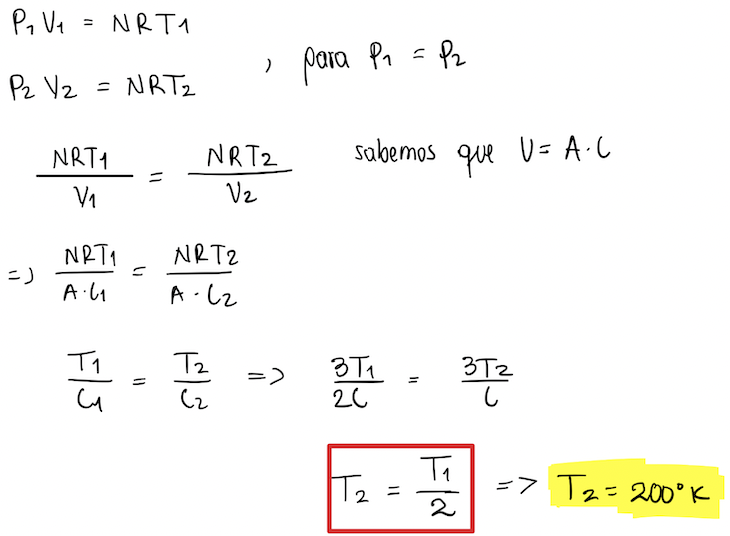

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc


#Metodo de runge Kutta 2
N = 100
tiempo = np.linspace(0.,30.,N)
h = (t[-1]-t[0])/(len(t))
condiciones_iniciales = [400, 200]
Temperatura_1 = np.zeros(len(t))
Temperatura_2 = np.zeros(len(t))

Temperatura_1[0] = condiciones_iniciales[0]
Temperatura_2[0] = condiciones_iniciales[1]

k = 389.6
A = 0.001
l = 0.30
n = 1
cv = 12.47

def dT1(T1,T2,k,A, l, n, cv):
    return -(k*A/(l*n*cv))*(T1-T2)



def dT2(T1,T2,k,A, l, n, cv):
    return (k*A/(l*n*cv))*(T1-T2)

for i in range(1, len(t)):
    k11 = dT1(Temperatura_1[i-1], Temperatura_2[i-1],k,A, l, n, cv)
    k21 = dT2(Temperatura_1[i-1], Temperatura_2[i-1],k,A, l, n, cv)

    k12 = dT1(Temperatura_1[i-1] + k11*h, Temperatura_2[i-1] +k21*h,k,A, l, n, cv)
    k22 = dT2(Temperatura_1[i-1] + k11*h, Temperatura_2[i-1] +k21*h,k,A, l, n, cv)

    Temperatura_1[i] = Temperatura_1[i - 1] + ((h / 2.0) * (k11 + k12))
    Temperatura_2[i] = Temperatura_2[i - 1] + ((h / 2.0) * (k21 + k22))
    


In [46]:
def GetEuler(dT1,dT2,condiciones_iniciales,t):
    global k
    global A
    global l
    global n
    global cv
    
    h = (t[-1] - t[0])/(len(t)-1)
    
    T1 = np.zeros(len(t))
    T2 = np.zeros(len(t))
    
    T1[0] = condiciones_iniciales[0]
    T2[0] = condiciones_iniciales[1]
    
    K1 = np.zeros(2)
    
    for i in range( 1, len(t) ):
        
        K1[0] = dT1(T1[i-1],T2[i-1],k,A, l, n, cv)
        K1[1] = dT2(T1[i-1],T2[i-1],k,A, l, n, cv)
        
        T1[i] = T1[i-1] + h*K1[0]
        T2[i] = T2[i-1] + h*K1[1]
        
    return T1, T2

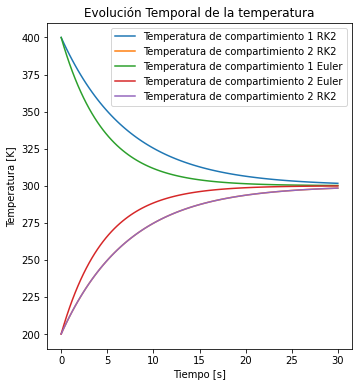

In [47]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.set_title("Evolución Temporal de la temperatura")
ax.set_xlabel("Tiempo [s]")
ax.set_ylabel("Temperatura [K]")

ax.plot(tiempo,Temperatura_1, label = "Temperatura de compartimiento 1 RK2")
ax.plot(tiempo,Temperatura_2, label = "Temperatura de compartimiento 2 RK2")

ax.plot(tiempo,T1, label="Temperatura de compartimiento 1 Euler")
ax.plot(tiempo,T2, label="Temperatura de compartimiento 2 Euler")

ax.plot(tiempo,Temperatura_2, label = "Temperatura de compartimiento 2 RK2")
ax.legend()

Se puede evidenciar, como era de esperarse, que despues de un largo tiempo, ambos compartimientos llegasen a una temperatura de equilibrio en común, ya que va a haber un flujo de calor a traves del sistema que lleva a que se equipare la temperatura en ambos sistemas debido al intercambio termodinamico presente. 

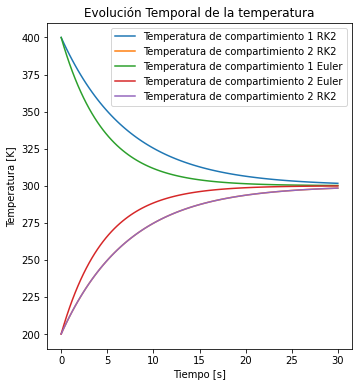

Adicionalmente, se puede evidenciar la diferencia de convergencia entre el metodo de Runge Kutta de orden 2 y el metodo de Euler

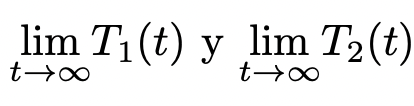

A partir de esto, se puede afirmar que el limite termodinamico de la temperatura del compartimiento 1 y la temperatura del compartimiento 2 es la misma, las cuales coinciden con el valor de 300K, lo cual es lo que se espera fenomenologicamente, puesto que dos compartimientos que tienen la capacidad de intercambiar calor entre sí, van a equiparar su temperatura cuando ha pasado mucho tiempo en contacto.